# Spotify's worldwide daily song ranking

Music streaming is ubiquitous. Currently, Spotify plays an important part on that. This dataset enable us to explore how artists and songs' popularity varies in time.

### Content

This dataset contains the daily ranking of the 200 most listened songs in 53 countries from 2017 and 2018 by Spotify users. It contains more than 2 million rows, which comprises 6629 artists, 18598 songs for a total count of one hundred five billion streams count.

The data spans from 1st January 2017 to 9th January 2018 and will be kept up-to-date on following versions. It has been collected from Spotify's regional chart data.

### About the Project
In this project we will try to analyze and explore the data of spotify and try to find that how the trend of music is changing with the passage of time in different countries



### 1. The Imports:
* **Packages Imported** :-

    1. sys: access to system parameters
    2. numpy : for numerical computation
    3. pandas: for data manipulation and analysis
    4. matplotlib: plotting library
    5. seaborn: plotting library based on matplotlib
    6. sklearn: machine learning library

In [337]:
# load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [338]:
## version of packages used
print(f'Numpy version: {np.__version__}')
print(f'Pandas version: {pd.__version__}')
print(f'Seaborn version: {sns.__version__}')

Numpy version: 1.15.4
Pandas version: 0.23.4
Seaborn version: 0.9.0


### 2.The Data:-
 * **The Contain following information** :-
     1. Position:- it tell us which postition does a music hold from 1 to 200 for a particular day in a particular region
     2. Track Name:- consist of the music name our title of the song
     3. Artist:- name of the artist for the respective music
     4. Streams:- in a particular day and particular region how amny times that music ic being played
     5. URl:-giev the url for that music 
     6. Date:- date 
     7. Region:- give the country code
  
  Read the data from musicdata.csv file

In [339]:
#save the data from musicdata.csv in musicdata dataframe
musicdata=pd.read_csv("musicdata.csv")

Using head function to display the data in musicdata

In [340]:
#To print the first 5 line of the data stored in musicdata
musicdata.head()

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec


~using describe function to view the statistical details like percentile ,mean,std etc.

In [341]:
musicdata.describe()

,Position,Streams
count,3.441197e+06,3.441197e+06
mean,9.464399e+01,5.189176e+04
std,5.739567e+01,2.018035e+05
min,1.000000e+00,1.001000e+03
25%,4.500000e+01,3.322000e+03
50%,9.200000e+01,9.227000e+03
75%,1.430000e+02,2.965800e+04
max,2.000000e+02,1.138152e+07


describe function describe the data.It gives us count mean min etc for all the integer column

~ using the info function to get the concise summary of the dataframe

In [342]:
musicdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3441197 entries, 0 to 3441196
Data columns (total 7 columns):
Position      int64
Track Name    object
Artist        object
Streams       int64
URL           object
Date          object
Region        object
dtypes: int64(2), object(5)
memory usage: 183.8+ MB


### We get the info that:-
   * **there are 7 columns**
   * **Position and Streams are of int type**
   * **Track Name,Artist,URL and Region are of str type**
           

In [343]:
musicdata.isnull().any()

Position      False
Track Name     True
Artist         True
Streams       False
URL            True
Date          False
Region        False
dtype: bool

isnull().isany() is the funtion which is used to find whether the column contain any nulll value or not.It return true if there are any null  value else false.
* **Using above function we get the following info about our dataset:-**

   **The Columns which have null value are:-**
      1.Track Name
      2.Artist
      3.URL
      
   **The columns which does not have any null value are:-**
      1.Position
      2.Streams
      3.Date
      4.Region


In [344]:
musicdata[musicdata["Artist"].isnull()]["Region"].shape

(657,)

~There are 657 null value for the Artist column

In [345]:
musicdata[musicdata["Track Name"].isnull()]["Region"].shape

(657,)

~There are 657 null value for the Track Name column

As from the above info we get to know that both the null numbers for column Artist and Track Name are same that is 657 therefore we try to find whether do these columns correspond to null value for same row .

In [347]:
#to prove that the artist and the track name have null value for same row
music=musicdata[musicdata["Track Name"].isnull()]
music2=music[music["Artist"].isnull()]
music2.shape

(657, 7)

~Hence from the above info we get to know that both the columns Artist and Track Name correspond to same row for the null value.

In [385]:
type(musicdata["Date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [348]:
musicdata["Date"]=pd.to_datetime(musicdata["Date"])

~Changing the dtype for Date column from str to datetime

In [349]:
musicdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3441197 entries, 0 to 3441196
Data columns (total 7 columns):
Position      int64
Track Name    object
Artist        object
Streams       int64
URL           object
Date          datetime64[ns]
Region        object
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 183.8+ MB


In [350]:
#number of unquie music
musicdata["Track Name"].nunique()

18597

In [351]:
#number of unquie aritist
musicdata["Artist"].nunique()

6628

In [352]:
#number of unique date
musicdata["Date"].nunique()

371

In [353]:
#number of unqiue region 
musicdata["Region"].nunique()

54

In [359]:
# to drop URl column from the table
musicdata.drop(["URL"],axis=1,inplace=True)
musicdata.head()

,Position,Track Name,Artist,Streams,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,2017-01-01,ec
1,2,Chantaje,Shakira,19270,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,2017-01-01,ec
4,5,Safari,J Balvin,14269,2017-01-01,ec


In [360]:
musicdata.shape

(3441197, 6)

~Earlier we were having 7 column but after deleting URl we arre left with 6 column.

In [361]:
# as number of columns is around 10 lakh so we can remove all those rows which have null value for artist and track name 
musicdata.dropna(inplace=True)
musicdata.shape


(3440540, 6)

In [362]:
musicdata.isnull().any()


Position      False
Track Name    False
Artist        False
Streams       False
Date          False
Region        False
dtype: bool

~ We made our data clean by removing all null value.

In [364]:
musicdata.head()

,Position,Track Name,Artist,Streams,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,2017-01-01,ec
1,2,Chantaje,Shakira,19270,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,2017-01-01,ec
4,5,Safari,J Balvin,14269,2017-01-01,ec


## 3. Data analysis and visualization

In [365]:
# we will create another table which consist of top position artist
top=musicdata[musicdata["Position"]==1]
top.drop(["Position"],axis=1,inplace=True)
top.sort_values("Streams",ascending=False,inplace=True)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Top is the dataframe which consist of all the music with First posititon  

In [366]:
print("Music with first position and maximum number of streams in single day on  {} is {}".format(top.iloc[0]["Date"],top.iloc[0]["Track Name"]))
print("And the artist of the music is" ,top.iloc[0]["Artist"])

Music with first position and maximum number of streams in single day on  2017-05-27 00:00:00 is Despacito (Featuring Daddy Yankee)
And the artist of the music is Luis Fonsi


In [367]:
# to count how many times the track name is being displayed at the top position
top2=pd.DataFrame(top.groupby("Track Name")["Region"].count())
top2["Track Name"]=top2.index
top2.sort_values("Region",ascending=False,inplace=True)
top2.reset_index(drop=True,inplace=True)
top3=top2[0:10]
top3.drop(["Region"],axis=1)

,Track Name
0,Shape of You
1,Despacito - Remix
2,rockstar
3,Despacito (Featuring Daddy Yankee)
4,Mi Gente
5,Felices los 4
6,Criminal
7,Look What You Made Me Do
8,Me Rehúso
9,Sensualidad


#### The above dataframe show top 10 music which hold the First Position and also have a maximum number of streams in a single day.

Text(0, 0.5, 'NUMBER OF REGION WHERE THE TRACK NAME HOLD FIRST POSITION')

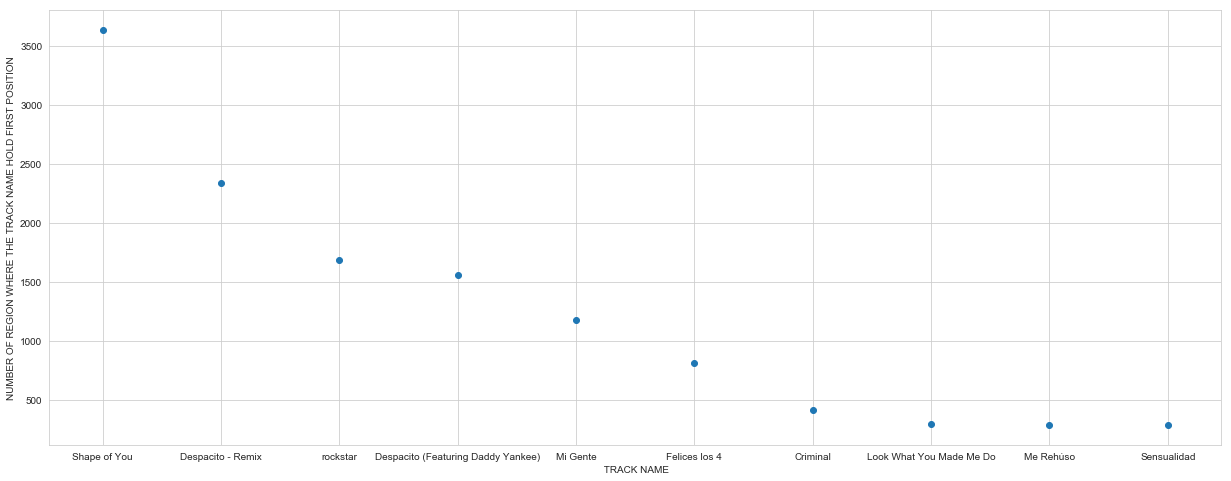

In [368]:

plt.figure(figsize=(21,8))
x=top3["Track Name"]
y=top3["Region"]
plt.scatter(x,y)
plt.xlabel(" TRACK NAME")
plt.ylabel("NUMBER OF REGION WHERE THE TRACK NAME HOLD FIRST POSITION")

* **Through graph we can conclude that** :-

  1. First there was drastic change in the graph for Shape of You and Despacito -Remix but then after that the change was   moderate
  2. Observation for top 10 music is that
       1. Shape of U and Despacito have a huge difference between them
       2. Despacito-Remix and Rockstar also have a difference but ot that much as compared with Shape of You and Despacito-Remix
       3. Mi Gente,Felices los and Criminal all have a constant descent
       4. Look What You Made Me Do ,Me Rehuso and Sensualidad are almost same.
  2. The top 3 music which hold first position in maximum region are
        1. Shape of You
        2. Despacito-Remix
        3. Rockstar
    

In [369]:
# to find the music in top dataframe which have the total sum of maximum number of streams
df=pd.DataFrame(top.groupby("Track Name").sum())
df["Track Name"]=df.index
df.sort_values("Streams",ascending=False,inplace=True)
df.reset_index(drop=True,inplace=True)
print("The music with the total number of maxium streams is ",df.iloc[0]["Track Name"])

The music with the total number of maxium streams is  Shape of You


##### Hence the maxium number of streams in a single day is for Despasito but the sum of number of streams is for Shape of you thus we can conclude that although Despasito  bagged the top place but it was streamed only a particular day maxmium time not remained constant like Shape of you

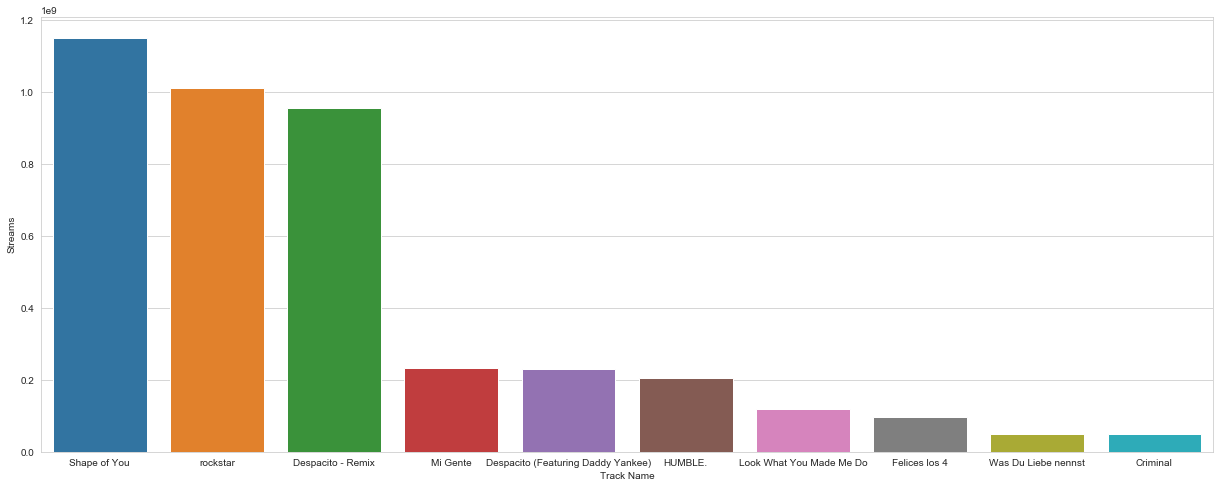

In [388]:
#barplot to show how the total sum of 10 top music streams 
df1=df[0:10]
plt.figure(figsize=(21,8))
sns.barplot(x="Track Name",y="Streams",data=df1)

* **Through graph we can conclude that** :-

  1. There is a lot of difference between 3rd and 4th song.
  2. Despacito remix was streamed more than Despacito because it's remix had some english lyrics which made it popular in        English    speaking county and Despacito only had pure Spanish lyrics.
  3. The top best 3 music through graph are:-
      1. Shape Of You
      2. Rockstar
      3. Despacito-Remix
    


In [389]:
# to find which day of the week has positioned the music at top maximum time 
top["week_name"]=top.Date.dt.weekday_name
week_count=pd.DataFrame(top["week_name"].value_counts())
week_count

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,week_name
Monday,2855
Sunday,2842
Tuesday,2814
Thursday,2809
Saturday,2802
Friday,2780
Wednesday,2765


On Monday the music were positoned First maxmium time.

In [372]:
week=pd.DataFrame(top.groupby("week_name").sum())
week["week_name"]=week.index
week.reset_index(drop=True,inplace=True)
plt.figure(figsize=(10,8))
week.sort_values(by="Streams",ascending=False,inplace=True)
week


,Streams,week_name
2,776937707,Saturday
0,774077686,Friday
4,726629414,Thursday
5,723287530,Tuesday
1,718063196,Monday
6,715485936,Wednesday
3,700503716,Sunday


<Figure size 720x576 with 0 Axes>

#### On saturday maximum steaming took place for first posititon song.

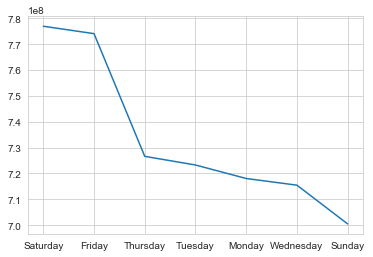

In [373]:
x=week["week_name"]
y=week["Streams"]
plt.plot(x,y)
#s.barplot(x="week_name",y="Streams",data=week)

 ~As the spotify releases maximum of the new song on Friday cause they will get full week to streams there songs.
  hence from above analysis we conclude that
 * *1.Maximum streaming of music takes place on friday and staturday on these days people explore more music.*
 * *2.On the basis of the streaming for whole week music are ranked on Monday.*

In [374]:
musicdata["Month"]=musicdata.Date.dt.month
musicdata.head()
musicdata_group_month=musicdata.groupby("Month")
musicdata_group_month.first()

,Position,Track Name,Artist,Streams,Date,Region
Month,,,,,,
1,1,Reggaetón Lento (Bailemos),CNCO,19272,2017-01-01,ec
2,1,Despacito (Featuring Daddy Yankee),Luis Fonsi,51099,2017-02-01,ec
3,1,Despacito (Featuring Daddy Yankee),Luis Fonsi,31215,2017-03-01,ec
4,1,Despacito (Featuring Daddy Yankee),Luis Fonsi,27598,2017-04-01,ec
5,1,Felices los 4,Maluma,24729,2017-05-01,ec
6,1,Felices los 4,Maluma,29625,2017-06-01,ec
7,1,Felices los 4,Maluma,27072,2017-07-01,ec
8,1,Mi Gente,J Balvin,24898,2017-08-01,ec
9,1,Robarte un Beso,Carlos Vives,25287,2017-09-01,ec


In [375]:
#onth_first=musicdata[musicdata["Month"]==1]
musicdata_group_month=musicdata.groupby("Month")
musicdata_group_month1=musicdata_group_month.get_group(1)

In [376]:
#working on month 1 (janunary)
# we will remove month column beause we already know that it is first month
musicdata_group_month1.drop(["Month"],inplace=True,axis=1)
musicdata_group_month1["Year"]=musicdata_group_month1.Date.dt.year
#df_filtered = df[df['Age'] >= 25] 
musicdata_group_month1_17=musicdata_group_month1[musicdata_group_month1["Year"]==2017]
musicdata_group_month1_18=musicdata_group_month1[musicdata_group_month1["Year"]==2018]

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [377]:
music_of_the_month=[]
total_streams=[]
musicinfo=musicdata[["Artist","Track Name"]]
#musicinfo.set_index("Track Name")
m=musicinfo.groupby("Track Name")
p=pd.DataFrame(m.first())
p["Track Name"]=p.index
p.reset_index(drop=True,inplace=True)
artist_of_the_month=[]

In [378]:
musicdata_month1_streams=pd.DataFrame(musicdata_group_month1_17.groupby("Track Name").sum())
musicdata_month1_streams.drop(["Position","Year"],inplace=True,axis=1)
musicdata_month1_streams["Track Name"]=musicdata_month1_streams.index
musicdata_month1_streams.sort_values("Streams",ascending=False,inplace=True)
musicdata_month1_streams.reset_index(drop=True,inplace=True)
musicdata_month1_streams10=musicdata_month1_streams[0:10]
print("THE TOP 10 MUSIC FOR THE JANUARY MONTH OF THE YEAR 2017")
music_of_the_month.append(musicdata_month1_streams10.loc[0]["Track Name"])
total_streams.append(musicdata_month1_streams10.loc[0]["Streams"])
#artist_of_the_month.append(p[p["Track Name"]==music_of_the_month[0]]["Artist"].iloc[0])
musicdata_month1_streams10
#artist_of_the_month
#music_of_the_month
#total_streams

THE TOP 10 MUSIC FOR THE JANUARY MONTH OF THE YEAR 2017


,Streams,Track Name
0,366007170,Shape of You
1,205431230,Starboy
2,204117591,Castle on the Hill
3,197597595,I Don’t Wanna Live Forever (Fifty Shades Darke...
4,192499556,Rockabye (feat. Sean Paul & Anne-Marie)
5,177079524,Closer
6,160604187,Say You Won't Let Go
7,156120058,Don't Wanna Know
8,155251962,I Feel It Coming
9,149075393,Fake Love


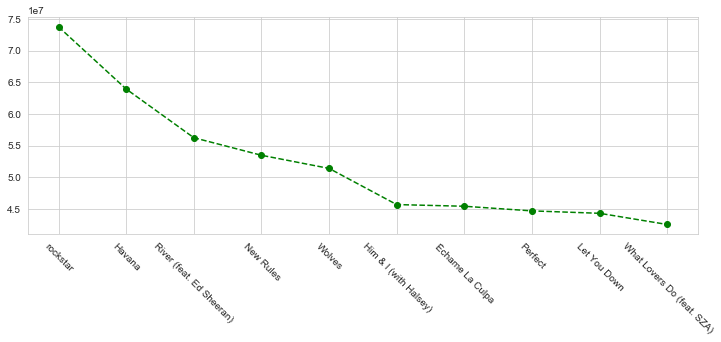

In [457]:
# graph for the Track Name versus total Streams for the month January for the year 2017
plt.figure(figsize=(12,4))
x=musicdata_month1_streams10["Track Name"]
y=musicdata_month1_streams10["Streams"]
plt.xticks(rotation=-45)
plt.plot(x,y,color="green",linestyle="dashed",marker="o")
#plot(x, y, color='green', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=12)

#sns.swarmplot(x=musicdata_month1_streams10["Track Name"],y=musicdata_month1_streams10["Streams"])
#sns.boxplot(data=musicdata_month1_streams10)

In [379]:
for i in range(2,13):
    musicdata_group_month6=musicdata_group_month.get_group(i)
# we will remove month column beause we already know that it is first month
    musicdata_group_month6.drop(["Month"],inplace=True,axis=1)
    musicdata_month6_streams=pd.DataFrame(musicdata_group_month6.groupby("Track Name").sum())
    musicdata_month6_streams.drop("Position",inplace=True,axis=1)
    musicdata_month6_streams["Track Name"]=musicdata_month6_streams.index
    musicdata_month6_streams.sort_values("Streams",ascending=False,inplace=True)
    musicdata_month6_streams.reset_index(drop=True,inplace=True)
    musicdata_month6_streams10=musicdata_month6_streams[0:10]
    music_of_the_month.append(musicdata_month6_streams10.loc[0]["Track Name"])
    total_streams.append(musicdata_month6_streams10.loc[0]["Streams"])
    print("THE TOP 10 MUSIC FOR THE {}Th MONTH ARE LISTED BELOW".format(i))
    print(musicdata_month6_streams10)

THE TOP 10 MUSIC FOR THE 2Th MONTH ARE LISTED BELOW
     Streams                                         Track Name
0  407227623                                       Shape of You
1  223633104  I Don’t Wanna Live Forever (Fifty Shades Darke...
2  212658310                                              Paris
3  202291897                 Despacito (Featuring Daddy Yankee)
4  161138178                                Scared to Be Lonely
5  160727365                                 Castle on the Hill
6  157802483            Rockabye (feat. Sean Paul & Anne-Marie)
7  137822676                                            Starboy
8  137505237                               Say You Won't Let Go
9  136660839                                   I Feel It Coming
THE TOP 10 MUSIC FOR THE 3Th MONTH ARE LISTED BELOW
     Streams                                         Track Name
0  469111248                                       Shape of You
1  256554494                    It Ain't Me (with Selena Gomez)


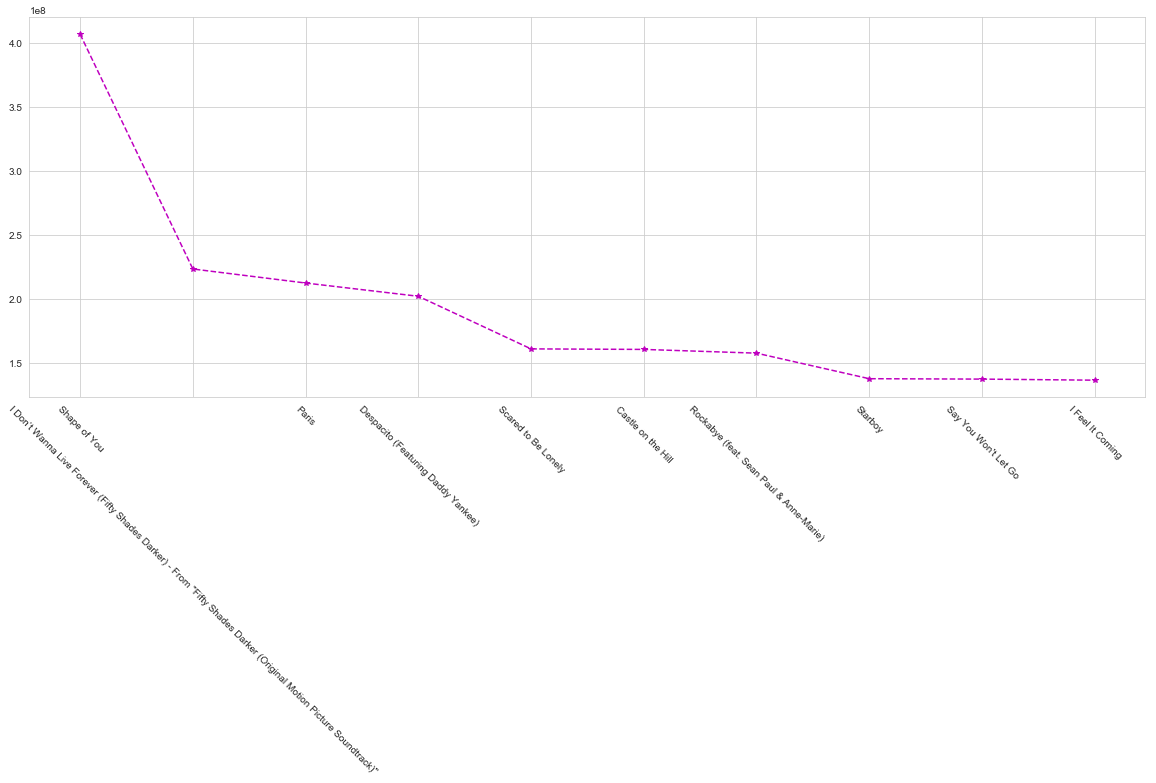

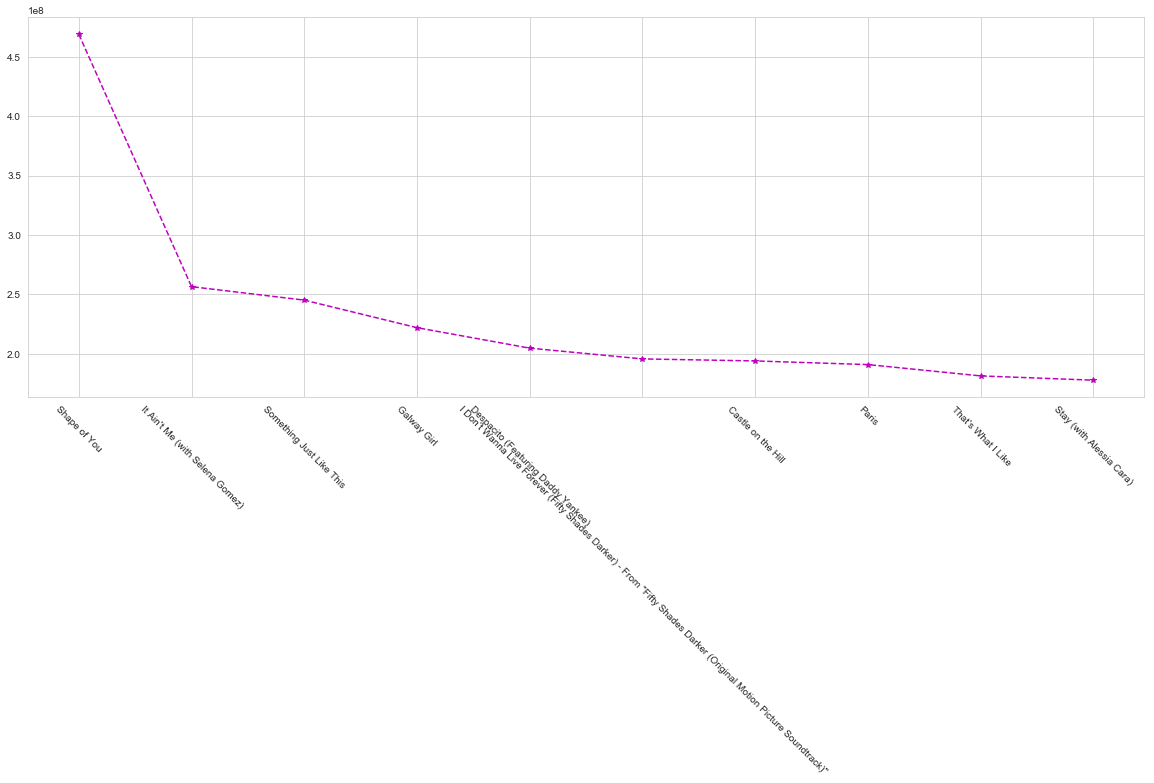

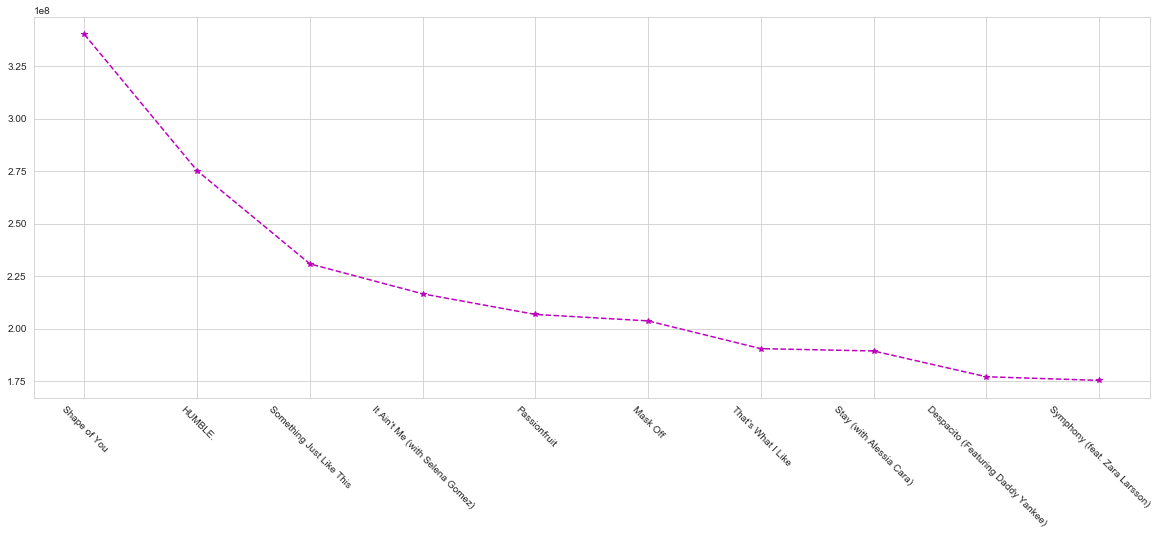

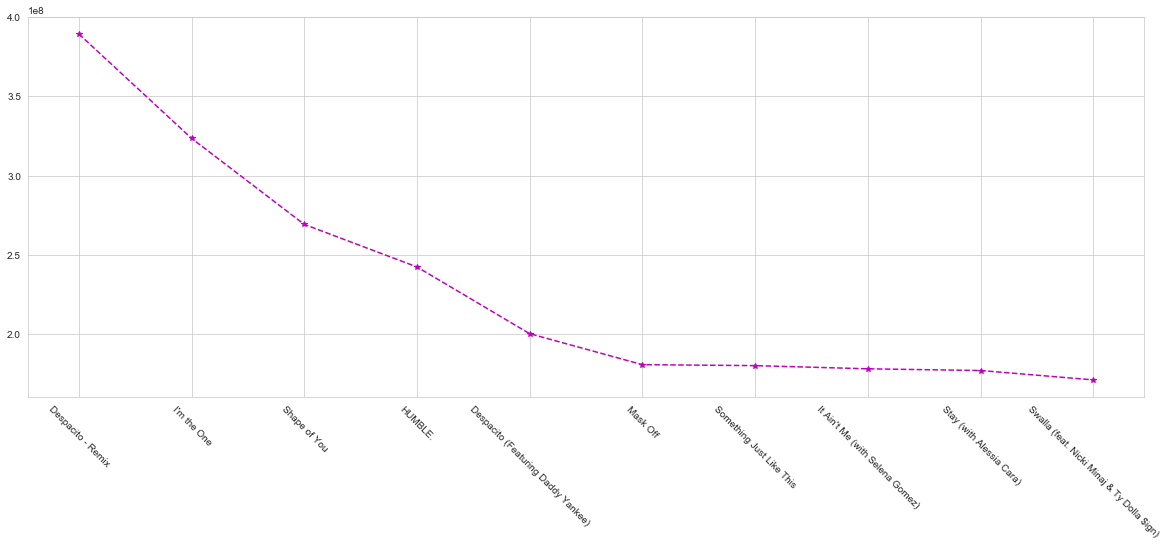

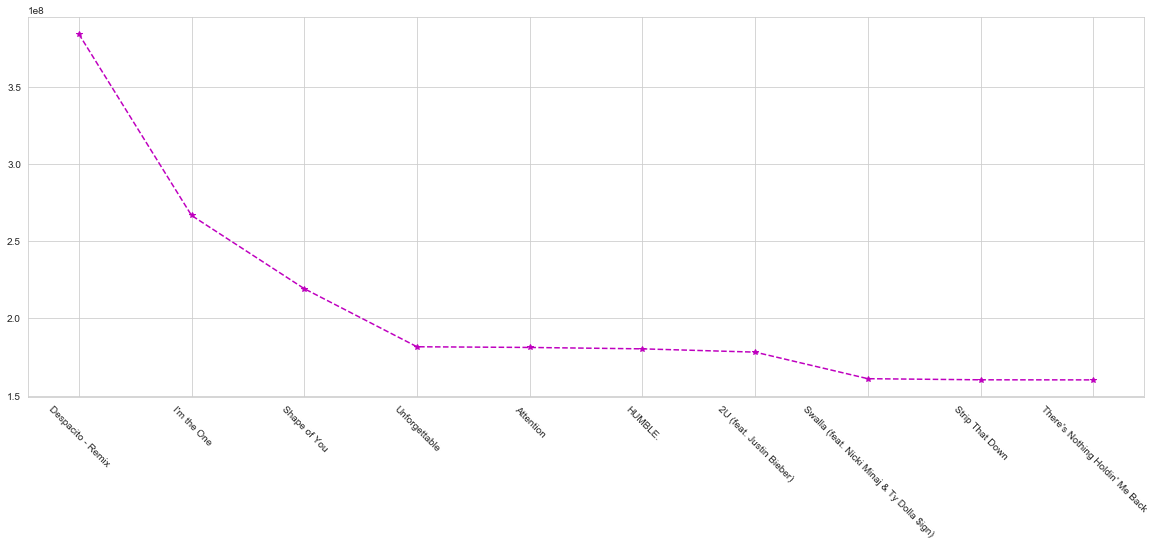

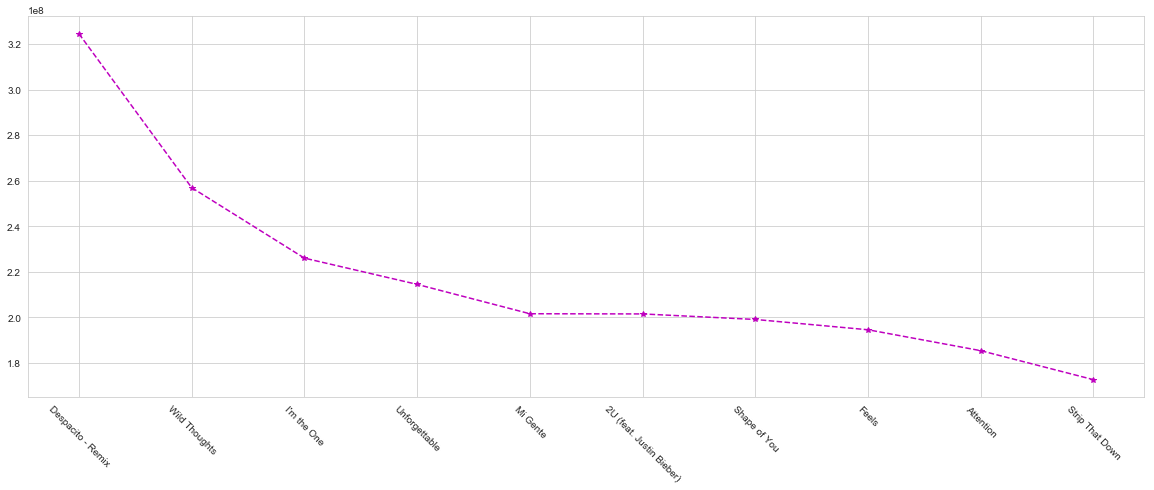

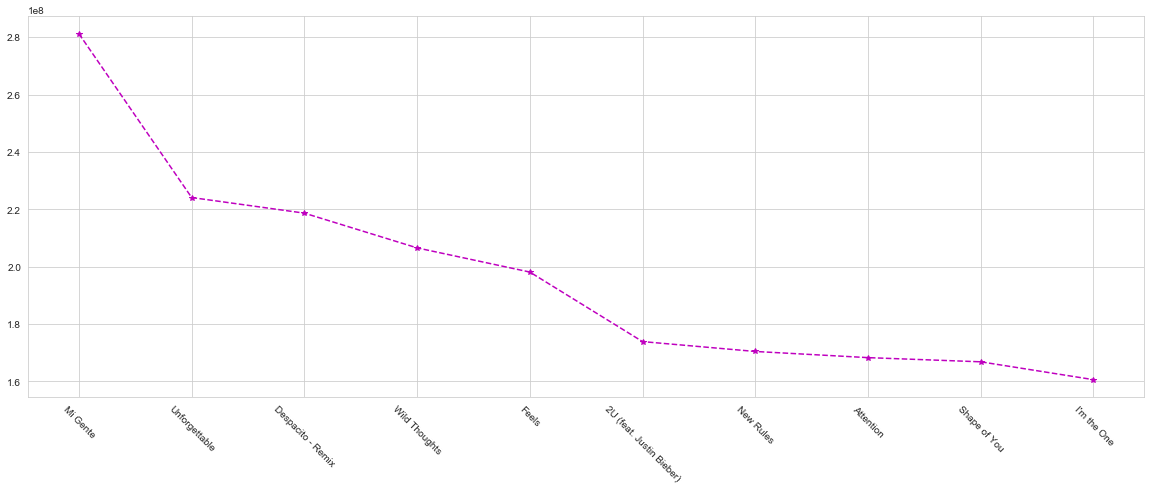

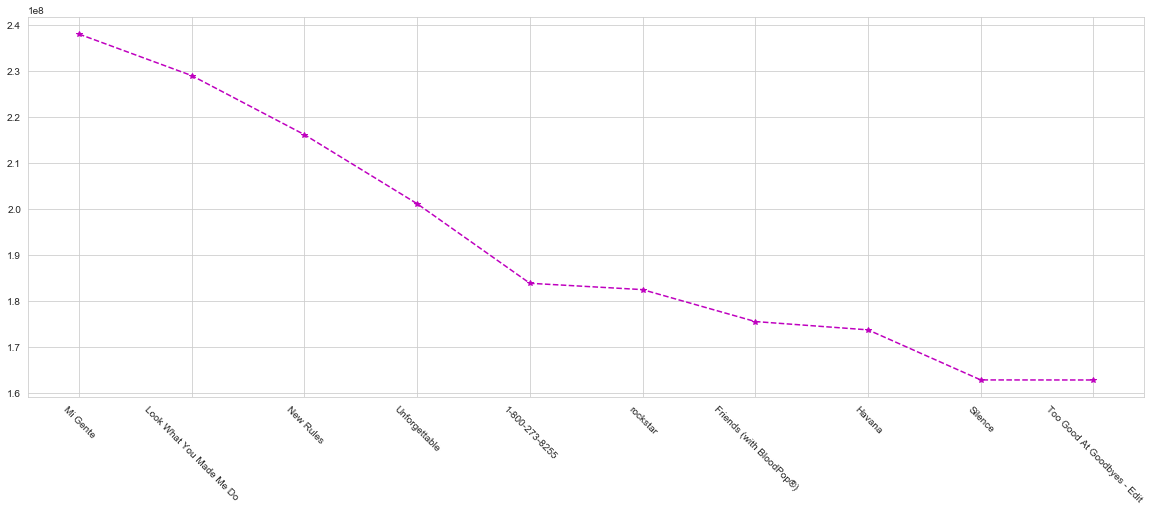

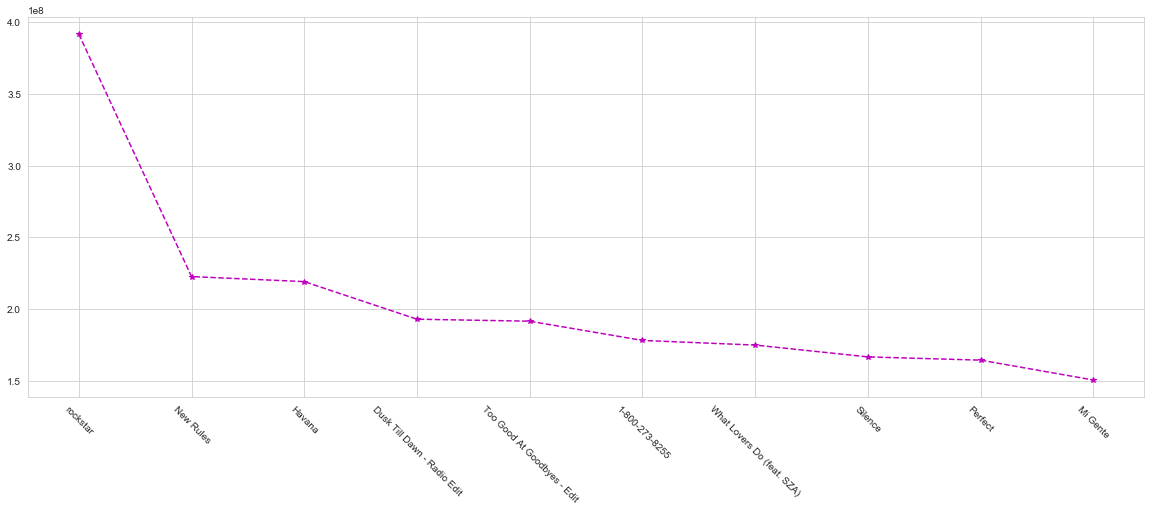

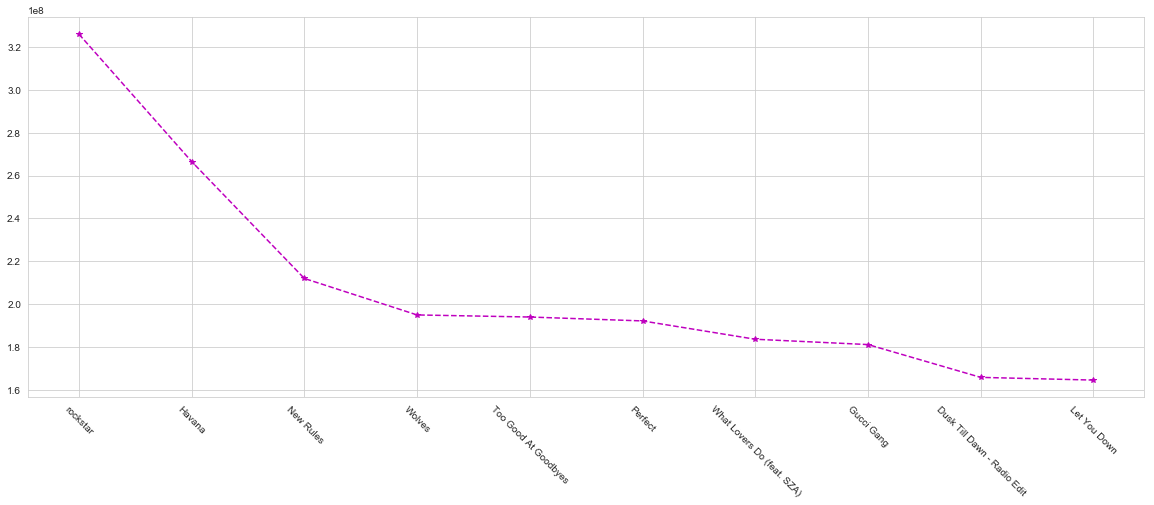

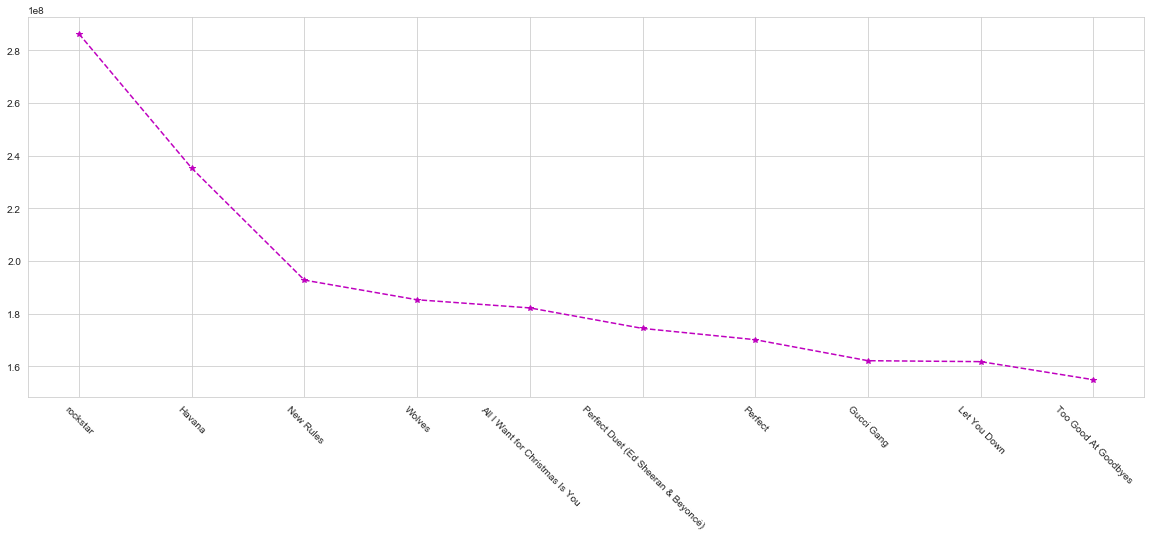

In [461]:
for i in range(2,13):
    musicdata_group_month6=musicdata_group_month.get_group(i)
# we will remove month column beause we already know that it is first month
    musicdata_group_month6.drop(["Month"],inplace=True,axis=1)
    musicdata_month6_streams=pd.DataFrame(musicdata_group_month6.groupby("Track Name").sum())
    musicdata_month6_streams.drop("Position",inplace=True,axis=1)
    musicdata_month6_streams["Track Name"]=musicdata_month6_streams.index
    musicdata_month6_streams.sort_values("Streams",ascending=False,inplace=True)
    musicdata_month6_streams.reset_index(drop=True,inplace=True)
    musicdata_month6_streams10=musicdata_month6_streams[0:10]
    #music_of_the_month.append(musicdata_month6_streams10.loc[0]["Track Name"])
    #total_streams.append(musicdata_month6_streams10.loc[0]["Streams"])
    #print("THE TOP 10 MUSIC FOR THE {}Th MONTH ARE LISTED BELOW".format(i))
    #print(musicdata_month6_streams10)
    plt.figure(figsize=(20,7))
    #plt.subplot(4,3,i5
    x=musicdata_month6_streams10["Track Name"]
    y=musicdata_month6_streams10["Streams"]
    #plt.scatter(x,y)
    #print("THE TOP 10 MUSIC FOR THE {}Th MONTH ARE LISTED BELOW".format(i))
    #sns.barplot(x=musicdata_month6_streams10["Track Name"],y=musicdata_month6_streams10["Streams"],data=musicdata_month6_streams10)
    plt.plot(x,y,color="m",linestyle="dashed",marker="*")
    plt.xticks(rotation=-45)

In [380]:
musicdata_month1_streams=pd.DataFrame(musicdata_group_month1_18.groupby("Track Name").sum())
musicdata_month1_streams.drop(["Position","Year"],inplace=True,axis=1)
musicdata_month1_streams["Track Name"]=musicdata_month1_streams.index
musicdata_month1_streams.sort_values("Streams",ascending=False,inplace=True)
musicdata_month1_streams.reset_index(drop=True,inplace=True)
musicdata_month1_streams10=musicdata_month1_streams[0:10]
music_of_the_month.append(musicdata_month1_streams10.loc[0]["Track Name"])
total_streams.append(musicdata_month1_streams10.loc[0]["Streams"])
#artist_of_the_month.append(p[p["Track Name"]==music_of_the_month-1]["Artist"].iloc[0])
print("THE TOP 10 MUSIC FOR THE JANUARY MONTH OF THE YEAR 2018")
musicdata_month1_streams10

THE TOP 10 MUSIC FOR THE JANUARY MONTH OF THE YEAR 2018


,Streams,Track Name
0,73770039,rockstar
1,63934777,Havana
2,56237047,River (feat. Ed Sheeran)
3,53457634,New Rules
4,51379759,Wolves
5,45660946,Him & I (with Halsey)
6,45394567,Échame La Culpa
7,44662859,Perfect
8,44280519,Let You Down
9,42511459,What Lovers Do (feat. SZA)


In [382]:
musicinfo=musicdata[["Artist","Track Name"]]
#musicinfo.set_index("Track Name")
m=musicinfo.groupby("Track Name")
p=pd.DataFrame(m.first())
p["Track Name"]=p.index
p.reset_index(drop=True,inplace=True)
artist_of_the_month=[]
for i in range(12):
    artist_of_the_month.append(p[p["Track Name"]==music_of_the_month[i]]["Artist"].iloc[0])
    #print(p[p["Track Name"]==music_of_the_month[i]]["Artist"].iloc[0])
artist_of_the_month.append(p[p["Track Name"]==music_of_the_month[-1]]["Artist"].iloc[0])    

In [386]:
month_info={}
month_info["month"]=["January 2017","Febuary","March","April","May","June","July","August","September","October","November","December","January 2018"]
month_info["total_streams"]=total_streams
month_info["music_of_the_month"]=music_of_the_month
month_info["artist_of_the_month"]=artist_of_the_month
pd.DataFrame.from_dict(month_info)

,month,total_streams,music_of_the_month,artist_of_the_month
0,January 2017,366007170,Shape of You,Ed Sheeran
1,Febuary,407227623,Shape of You,Ed Sheeran
2,March,469111248,Shape of You,Ed Sheeran
3,April,340035736,Shape of You,Ed Sheeran
4,May,389445999,Despacito - Remix,Luis Fonsi
5,June,384304420,Despacito - Remix,Luis Fonsi
6,July,324530644,Despacito - Remix,Luis Fonsi
7,August,281206000,Mi Gente,J Balvin
8,September,237994936,Mi Gente,J Balvin
9,October,391652771,rockstar,Post Malone
